In [51]:
import pandas as pd 
import numpy as np 
import math 
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn import preprocessing


In [52]:
data=pd.read_csv("D:\\project rain\\rainfall1.csv") 
print("Data heads:") 
print(data.head()) 
print("Null values in the dataset before preprocessing:") 
print(data.isnull().sum()) 
print("Filling null values with mean of that particular column") 
data=data.fillna(np.mean(data)) 
print("Mean of data:") 
print(np.mean(data)) 
print("Null values in the dataset after preprocessing:") 
print(data.isnull().sum()) 
print("\n\nShape: ",data.shape)

Data heads:
                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    

In [53]:
print("Info:")
print(data.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
SUBDIVISION    4116 non-null object
YEAR           4116 non-null int64
JAN            4116 non-null float64
FEB            4116 non-null float64
MAR            4116 non-null float64
APR            4116 non-null float64
MAY            4116 non-null float64
JUN            4116 non-null float64
JUL            4116 non-null float64
AUG            4116 non-null float64
SEP            4116 non-null float64
OCT            4116 non-null float64
NOV            4116 non-null float64
DEC            4116 non-null float64
ANNUAL         4116 non-null float64
Jan-Feb        4116 non-null float64
Mar-May        4116 non-null float64
Jun-Sep        4116 non-null float64
Oct-Dec        4116 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 611.1+ KB
None


In [54]:
print("Group by:") 
data.groupby('SUBDIVISION').size()


Group by:


SUBDIVISION
ANDAMAN & NICOBAR ISLANDS             110
ARUNACHAL PRADESH                      97
ASSAM & MEGHALAYA                     115
BIHAR                                 115
CHHATTISGARH                          115
COASTAL ANDHRA PRADESH                115
COASTAL KARNATAKA                     115
EAST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
EAST UTTAR PRADESH                    115
GANGETIC WEST BENGAL                  115
GUJARAT REGION                        115
HARYANA DELHI & CHANDIGARH            115
HIMACHAL PRADESH                      115
JAMMU & KASHMIR                       115
JHARKHAND                             115
KERALA                                115
KONKAN & GOA                          115
LAKSHADWEEP                           114
MADHYA MAHARASHTRA                    115
MATATHWADA                            115
NAGA MANI MIZO TRIPURA                115
NORTH INTERIOR KARNATAKA              115
ORISSA                

In [55]:
print("Co-Variance =",data.cov()) 
print("Co-Relation =",data.corr())

Co-Variance =                 YEAR          JAN          FEB           MAR           APR  \
YEAR     1098.319127   -62.525455   -26.333846     31.608776     17.985597   
JAN       -62.525455  1126.880700   549.299548    627.375837    475.344306   
FEB       -26.333846   549.299548  1288.551221    974.300386    892.111938   
MAR        31.608776   627.375837   974.300386   2201.972143   1766.214414   
APR        17.985597   475.344306   892.111938   1766.214414   4596.594854   
MAY        14.668989   535.377197   896.648721   2094.072720   5433.121872   
JUN      -105.646427  -265.334667   283.409286   1819.002965   7239.347234   
JUL      -144.815256  -465.128448   156.524886   1227.377060   4883.946095   
AUG        40.268753    75.536029   488.385320   1195.021166   3275.971621   
SEP       -29.893921   110.216877   388.537697   1133.597551   3507.500523   
OCT         7.922814    41.252990   -16.324506    401.044464   2478.380760   
NOV       -42.624271   154.517515   -57.342083    

In [56]:
corr_cols=data.corr()['ANNUAL'].sort_values()[::-1] 
print("Index of correlation columns:",corr_cols.index)


Index of correlation columns: Index(['ANNUAL', 'Jun-Sep', 'JUN', 'JUL', 'AUG', 'SEP', 'MAY', 'Mar-May',
       'OCT', 'APR', 'Oct-Dec', 'MAR', 'NOV', 'DEC', 'FEB', 'Jan-Feb', 'JAN',
       'YEAR'],
      dtype='object')


SUBDIVISION
COASTAL KARNATAKA    3391.040947
ARUNACHAL PRADESH    3294.660344
KONKAN & GOA         2977.686087
Name: ANNUAL, dtype: float64
SUBDIVISION
HARYANA DELHI & CHANDIGARH    530.496522
SAURASHTRA & KUTCH            495.161739
WEST RAJASTHAN                292.673043
Name: ANNUAL, dtype: float64


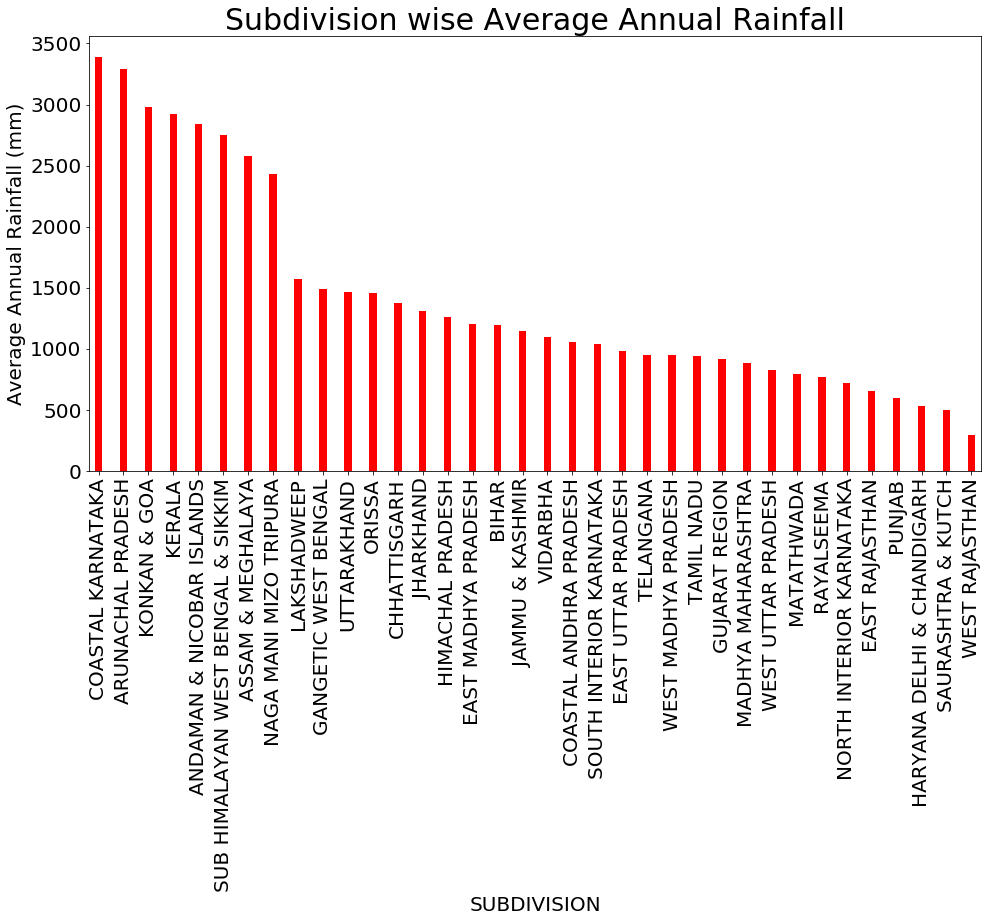

In [57]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
data.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'].plot(kind='bar', color='r',width=0.3,title='Subdivision wise Average Annual Rainfall', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Average Annual Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print(data.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[0,1,2]])
print(data.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[33,34,35]])

Scatter plot of annual and january attributes


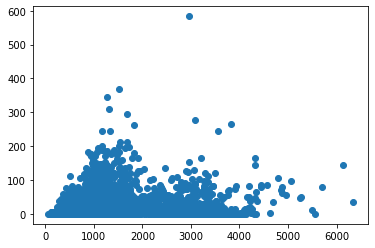

In [58]:
print("Scatter plot of annual and january attributes") 
plt.scatter(data.ANNUAL,data.JAN)
 

In [59]:
d2=data.drop(['SUBDIVISION','YEAR','ANNUAL','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec'],axis=1) 
k=((d2.head().sum())) 
month=list(d2.head())
print("Months are: ",month) 
print(k)
s=0 
for i in d2.sum():    
    s=s+i 
print("Total recorded rainfall in these 12 months",s) 
probability=list(k/s) 
print(probability) 
max_rainfall=max(probability) 
for i in range(len(month)):    
    if probability[i]==max_rainfall:        
        print("Maximum Rainfall will be in the month of",month[i]) 
min_rainfall=min(probability) 
for i in range(len(month)):    
    if probability[i]==min_rainfall:        
        print("Minimum Rainfall will be in the month of",month[i])


Months are:  ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
JAN      72.6
FEB     405.6
MAR      44.7
APR     232.6
MAY    1794.0
JUN    2658.3
JUL    2193.1
AUG    2052.1
SEP    2455.2
OCT    1249.8
NOV    1535.7
DEC     803.9
dtype: float64
Total recorded rainfall in these 12 months 5829542.827152476
[1.2453806782557342e-05, 6.957663954552696e-05, 7.667839713227454e-06, 3.9900212914915124e-05, 0.00030774282875906155, 0.00045600488388529176, 0.0003762044580554615, 0.00035201731265132127, 0.00042116510210103014, 0.0002143907399013797, 0.0002634340368591365, 0.00013790103681126512]
Maximum Rainfall will be in the month of JUN
Minimum Rainfall will be in the month of MAR


___Multiple Linear regression model between annual rainfall and the periodic rainfall___
Train x shape (2881, 4) ; Test_x (1235, 4)
Train y shape (2881,) ; Test_y (1235,)
Mean Squared Error = 3326.4157535418717
Root Mean Squared Error = 57.67508780697149
Mean Absolute Error = 10.953757241508635
r2_score = 0.9958637383726687


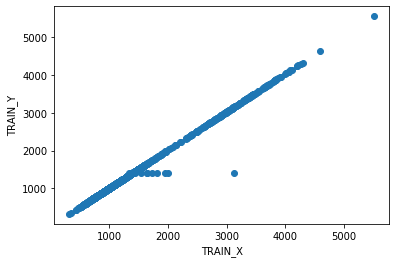

In [60]:
from sklearn import linear_model
print("___Multiple Linear regression model between annual rainfall and the periodic rainfall___")
y=data['ANNUAL'] 
x=data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']] 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,shuffle=False) 
'''train_x=train_x[:,np.newaxis] 
test_x=test_x[:,np.newaxis]''' 
print("Train x shape",train_x.shape,"; Test_x",test_x.shape) 
print("Train y shape",train_y.shape,"; Test_y",test_y.shape) 
lm=linear_model.LinearRegression() 
lm.fit(train_x,train_y) 
pred=lm.predict(test_x) 
#print(test_y) 
#print(pred) 
print("Mean Squared Error =",mean_squared_error(test_y,pred)) 
print("Root Mean Squared Error =",np.sqrt(mean_squared_error(test_y,pred))) 
print("Mean Absolute Error =",mean_absolute_error(test_y,pred)) 
print("r2_score =",r2_score(test_y,pred)) 
plt.scatter(pred,test_y) 
plt.xlabel('TRAIN_X') 
plt.ylabel('TRAIN_Y') 
plt.show()

In [61]:
expected=[] 
for i in test_y:    
    if i>2000:        
        expected.append("high")    
    else:        
        expected.append("low")
predicted=[] 
for i in pred:    
    if i>2000:        
        predicted.append("high")    
    else:        
        predicted.append("low") 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
acc=accuracy_score(predicted,expected) 
matrix=confusion_matrix(predicted,expected) 
clas=classification_report(predicted,expected) 
print("accuracy") 
print(acc) 
print("\n") 
print("classification") 
print(clas)


accuracy
0.9983805668016195


classification
              precision    recall  f1-score   support

        high       1.00      0.99      1.00       237
         low       1.00      1.00      1.00       998

    accuracy                           1.00      1235
   macro avg       1.00      1.00      1.00      1235
weighted avg       1.00      1.00      1.00      1235



In [62]:

#Function to plot the graphs
def plot_graphs(groundtruth,prediction,title):        
    N = 9
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') )
    ax.legend( (rects1[0], rects2[0]), ('Ground truth', 'Prediction') )

#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)

    plt.show()

In [63]:

# seperation of training and testing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(data[['JAN', 'FEB', 'MAR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
#test p
p = 1901
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == p]

data_p = np.asarray(temp[['JAN', 'FEB', 'MAR','APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'ORISSA'])

X_year_p = None; y_year_p = None
for i in range(data_p.shape[1]-3):
    if X_year_p is None:
        X_year_p = data_p[:, i:i+3]
        y_year_p = data_p[:, i+3]
    else:
        X_year_p = np.concatenate((X_year_p, data_p[:, i:i+3]), axis=0)
        y_year_p = np.concatenate((y_year_p, data_p[:, i+3]), axis=0)

In [65]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print ("mean_absolute_error",(y_pred))

mean_absolute_error [317.05015289  71.56652199 143.85506892 ... 326.9843658   73.74237828
  97.32056018]


Mean of the given year
129.27777777777777 148.42083453570197
Standard deviation for given year
101.1118717920104 70.71237530894955


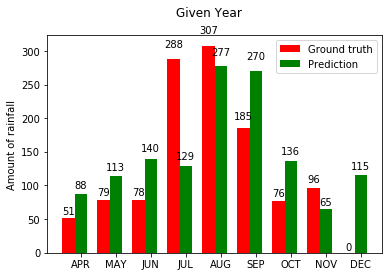

In [66]:
#p
y_year_pred_p = reg.predict(X_year_p)

print ("Mean of the given year")
print (np.mean(y_year_p),np.mean(y_year_pred_p))
print ("Standard deviation for given year")
print (np.sqrt(np.var(y_year_p)),np.sqrt(np.var(y_year_pred_p)))
plot_graphs(y_year_p,y_year_pred_p,"Given Year")